# profit estimation of companies with linear regression

In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

### loading the dataset

In [3]:
companies = pd.read_csv('1000_Companies.csv')
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#Research and Development (R&D)

### Observing Correlation between Columns

In [5]:
companies[['R&D Spend','Administration','Marketing Spend']].corr()

,R&D Spend,Administration,Marketing Spend
R&D Spend,1.000000,0.582434,0.978407
Administration,0.582434,1.000000,0.520465
Marketing Spend,0.978407,0.520465,1.000000


<AxesSubplot:>

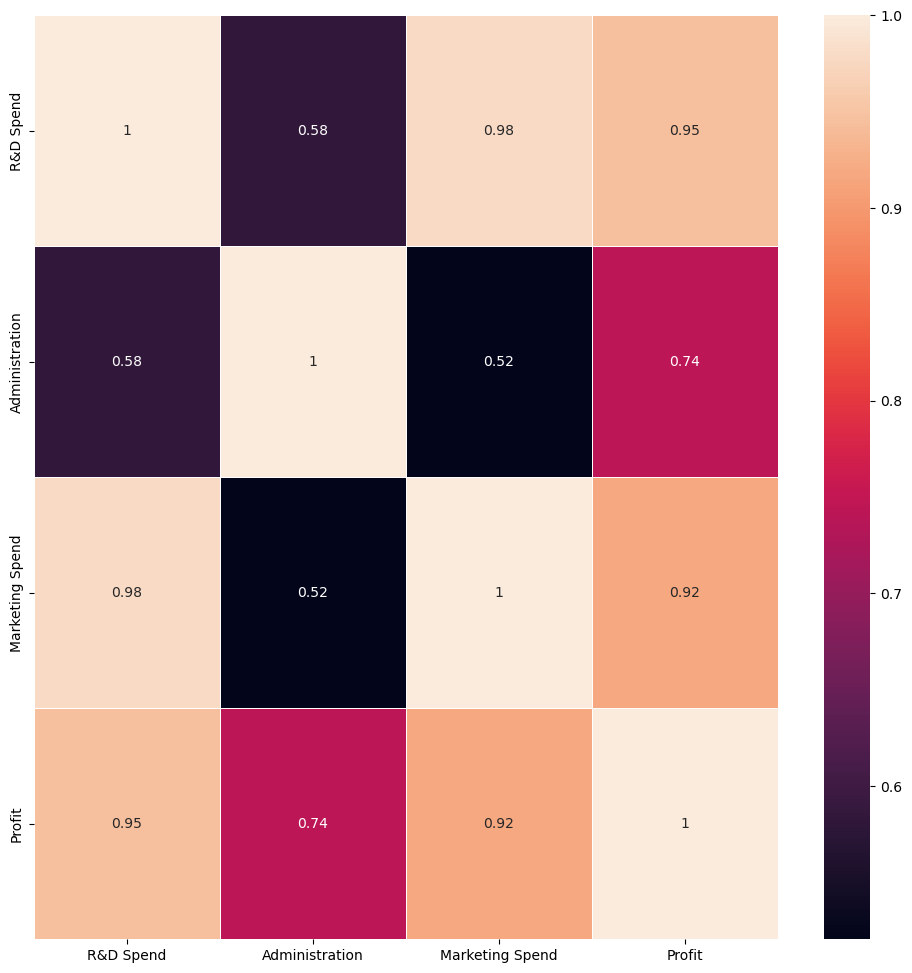

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(companies.corr(),annot = True, linewidths=.5) 

### removing column due to high correlation

In [8]:
companies.drop(['Marketing Spend'],axis=1,inplace=True)

In [9]:
companies

,R&D Spend,Administration,State,Profit
0,165349.20,136897.800,New York,192261.83000
1,162597.70,151377.590,California,191792.06000
2,153441.51,101145.550,Florida,191050.39000
3,144372.41,118671.850,New York,182901.99000
4,142107.34,91391.770,Florida,166187.94000
...,...,...,...,...
995,54135.00,118451.999,California,95279.96251
996,134970.00,130390.080,California,164336.60550
997,100275.47,241926.310,California,413956.48000
998,128456.23,321652.140,California,333962.19000


### Encoding Data



In [10]:
dummies=pd.get_dummies(companies.State,drop_first=True)

In [11]:
companies=pd.concat([companies,dummies],axis=1)

In [12]:
companies

,R&D Spend,Administration,State,Profit,Florida,New York
0,165349.20,136897.800,New York,192261.83000,0,1
1,162597.70,151377.590,California,191792.06000,0,0
2,153441.51,101145.550,Florida,191050.39000,1,0
3,144372.41,118671.850,New York,182901.99000,0,1
4,142107.34,91391.770,Florida,166187.94000,1,0
...,...,...,...,...,...,...
995,54135.00,118451.999,California,95279.96251,0,0
996,134970.00,130390.080,California,164336.60550,0,0
997,100275.47,241926.310,California,413956.48000,0,0
998,128456.23,321652.140,California,333962.19000,0,0


In [13]:
companies.drop(['State'],axis=1,inplace=True)
companies

,R&D Spend,Administration,Profit,Florida,New York
0,165349.20,136897.800,192261.83000,0,1
1,162597.70,151377.590,191792.06000,0,0
2,153441.51,101145.550,191050.39000,1,0
3,144372.41,118671.850,182901.99000,0,1
4,142107.34,91391.770,166187.94000,1,0
...,...,...,...,...,...
995,54135.00,118451.999,95279.96251,0,0
996,134970.00,130390.080,164336.60550,0,0
997,100275.47,241926.310,413956.48000,0,0
998,128456.23,321652.140,333962.19000,0,0


### Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
companies[['R&D Spend','Administration']]=scale.fit_transform(companies[['R&D Spend','Administration']])

In [15]:
companies

,R&D Spend,Administration,Profit,Florida,New York
0,1.000000,0.316659,192261.83000,0,1
1,0.983359,0.370214,191792.06000,0,0
2,0.927985,0.184424,191050.39000,1,0
3,0.873136,0.249247,182901.99000,0,1
4,0.859438,0.148348,166187.94000,1,0
...,...,...,...,...,...
995,0.327398,0.248434,95279.96251,0,0
996,0.816272,0.292589,164336.60550,0,0
997,0.606447,0.705122,413956.48000,0,0
998,0.776878,1.000000,333962.19000,0,0


### Specifying X and y

In [16]:
y=companies.iloc[:,2].values
y


array([192261.83   , 191792.06   , 191050.39   , 182901.99   ,
       166187.94   , 156991.12   , 156122.51   , 155752.6    ,
       152211.77   , 149759.96   , 146121.95   , 144259.4    ,
       141585.52   , 134307.35   , 132602.65   , 129917.04   ,
       126992.93   , 125370.37   , 124266.9    , 122776.86   ,
       118474.03   , 111313.02   , 110352.25   , 108733.99   ,
       108552.04   , 107404.34   , 105733.54   , 105008.31   ,
       103282.38   , 101004.64   ,  99937.59   ,  97483.56   ,
        97427.84   ,  96778.92   ,  96712.8    ,  96479.51   ,
        90708.19   ,  89949.14   ,  81229.06   ,  81005.76   ,
        78239.91   ,  77798.83   ,  71498.49   ,  69758.98   ,
        65200.33   ,  64926.08   ,  49490.75   ,  42559.73   ,
        35673.41   ,  14681.4    , 123485.2464 ,  82155.48418,
       125867.0108 , 104976.1696 ,  89803.10053,  75297.23305,
       114284.5283 , 171985.0761 ,  72337.96774, 169566.5772 ,
       158670.9451 , 114522.8756 ,  85842.60573, 101106

In [17]:
companies.drop(['Profit'],axis=1,inplace=True)
companies


,R&D Spend,Administration,Florida,New York
0,1.000000,0.316659,0,1
1,0.983359,0.370214,0,0
2,0.927985,0.184424,1,0
3,0.873136,0.249247,0,1
4,0.859438,0.148348,1,0
...,...,...,...,...
995,0.327398,0.248434,0,0
996,0.816272,0.292589,0,0
997,0.606447,0.705122,0,0
998,0.776878,1.000000,0,0


In [18]:
X=companies.iloc[:,:].values
X.shape

(1000, 4)

### splitting dataset into train and test

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


### fitting model to training set

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

### predicting the test dataset

In [21]:
y_pred = lin_reg.predict(X_test)

### finding coefficients and intercepts

In [22]:
# coefficient 
print(lin_reg.coef_)

[120926.28381048 229977.19020541   -500.92384786   -445.29843037]


In [23]:
# intercepts
print(lin_reg.intercept_)

-937.1148480373813


### evaluating the model

In [24]:
# calculating the  R squared error
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9227500022763352